### Decision Tree Classifier & Logistic Regression: Loan Approval

In [ ]:
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv(r'D:\my stuff\Coding\ML\loan_classification.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
my_df = df.select_dtypes(exclude=[object])
my_df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [9]:
df1 = df[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome',
          'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area', 'Loan_Status']]

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [11]:
df1.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df1.dropna(inplace=True)

C:\Users\Mrunmayee\AppData\Local\Temp\ipykernel_21004\3614008390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


In [13]:
df1.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: ylabel='LoanAmount'>

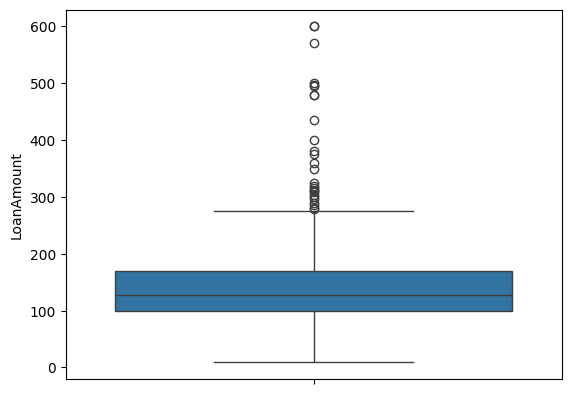

In [14]:
sns.boxplot(df1['LoanAmount'])

<Axes: ylabel='CoapplicantIncome'>

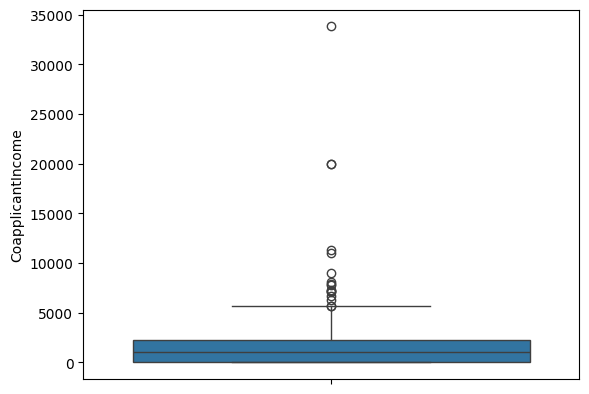

In [15]:
sns.boxplot(df1['CoapplicantIncome'])

<Axes: ylabel='ApplicantIncome'>

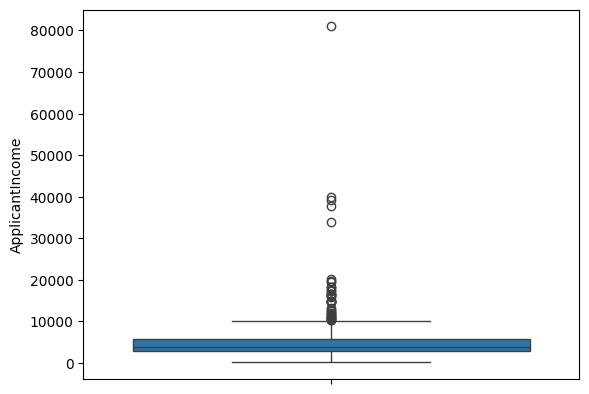

In [16]:
sns.boxplot(df1['ApplicantIncome'])

<Axes: ylabel='Self_Employed'>

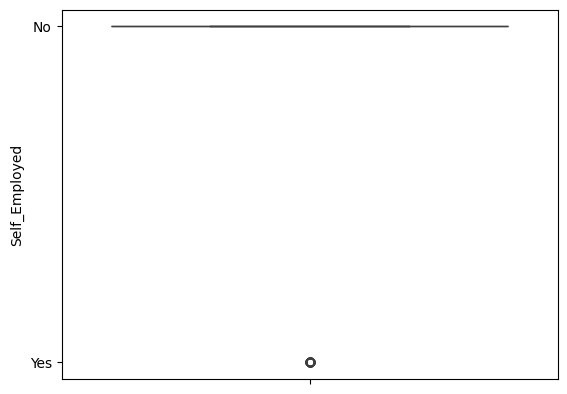

In [17]:
sns.boxplot(df1['Self_Employed'])

<Axes: ylabel='Education'>

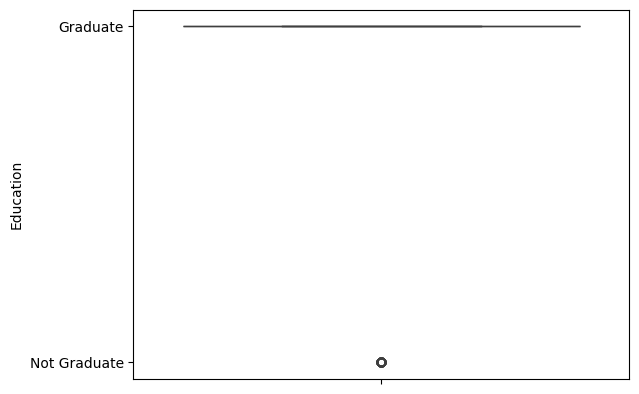

In [18]:
sns.boxplot(df1['Education'])

<Axes: ylabel='Gender'>

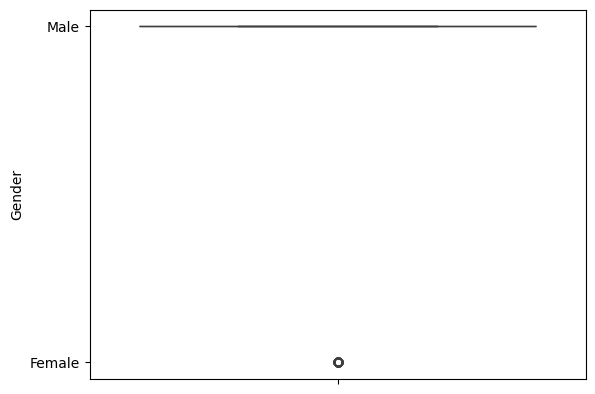

In [19]:
sns.boxplot(df1['Gender'])

<Axes: ylabel='ApplicantIncome'>

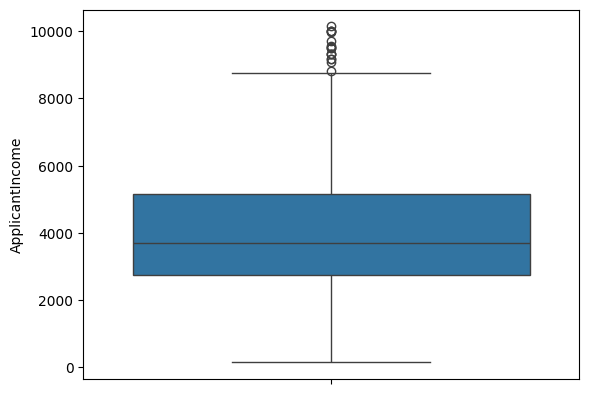

In [20]:
Q1 = df1['ApplicantIncome'].quantile(0.25)
Q3 = df1['ApplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df2 = df1[(df1['ApplicantIncome'] > l_limit) & (df1['ApplicantIncome'] < u_limit)]
sns.boxplot(df2['ApplicantIncome'])

<Axes: ylabel='CoapplicantIncome'>

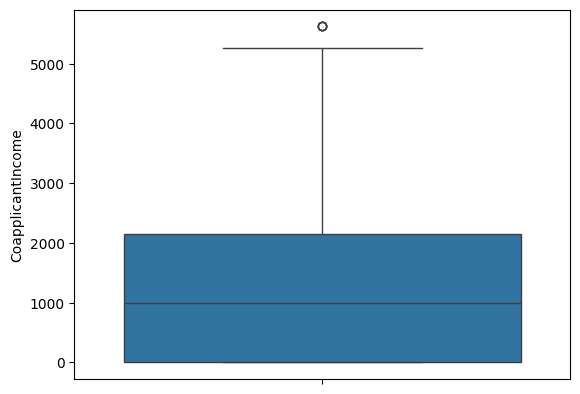

In [21]:
Q1 = df1['CoapplicantIncome'].quantile(0.25)
Q3 = df1['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df2 = df1[(df1['CoapplicantIncome'] > l_limit) & (df1['CoapplicantIncome'] < u_limit)]
sns.boxplot(df2['CoapplicantIncome'])

<Axes: ylabel='LoanAmount'>

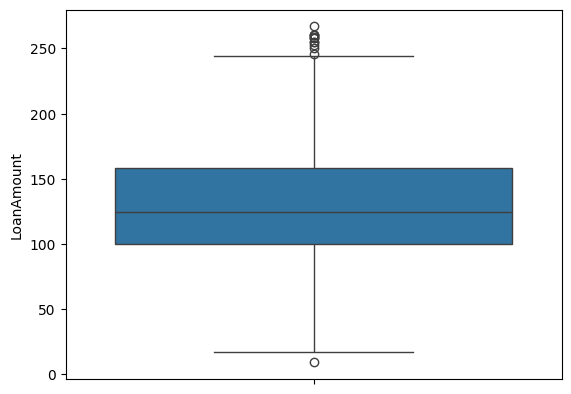

In [22]:
Q1 = df1['LoanAmount'].quantile(0.25)
Q3 = df1['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df2 = df1[(df1['LoanAmount'] > l_limit) & (df1['LoanAmount'] < u_limit)]
sns.boxplot(df2['LoanAmount'])

In [23]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

df2['Gender'] = lb.fit_transform(df2['Gender'])
df2['Married'] = lb.fit_transform(df2['Married'])
df2['Dependents'] = lb.fit_transform(df2['Dependents'])
df2['Education'] = lb.fit_transform(df2['Education'])
df2['Self_Employed'] = lb.fit_transform(df2['Self_Employed'])
df2['Property_Area'] = lb.fit_transform(df2['Property_Area'])
df2['Loan_Status'] = lb.fit_transform(df2['Loan_Status'])

C:\Users\Mrunmayee\AppData\Local\Temp\ipykernel_21004\1495092348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Gender'] = lb.fit_transform(df2['Gender'])
C:\Users\Mrunmayee\AppData\Local\Temp\ipykernel_21004\1495092348.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Married'] = lb.fit_transform(df2['Married'])
C:\Users\Mrunmayee\AppData\Local\Temp\ipykernel_21004\1495092348.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             450 non-null    int32  
 1   Married            450 non-null    int32  
 2   Dependents         450 non-null    int32  
 3   Education          450 non-null    int32  
 4   Self_Employed      450 non-null    int32  
 5   ApplicantIncome    450 non-null    int64  
 6   CoapplicantIncome  450 non-null    float64
 7   LoanAmount         450 non-null    float64
 8   Loan_Amount_Term   450 non-null    float64
 9   Credit_History     450 non-null    float64
 10  Property_Area      450 non-null    int32  
 11  Loan_Status        450 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 33.4 KB


In [25]:
x = df2[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome',
          'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]
y = df2['Loan_Status']

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, recall_score

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [28]:
dtc_entropy = DecisionTreeClassifier(criterion='entropy')
model_entropy = dtc_entropy.fit(x_train, y_train)
y_pred = model_entropy.predict(x_test)

In [29]:
accuracy_score(y_test, y_pred)

0.7222222222222222

In [30]:
recall_score(y_test, y_pred, average='macro')

0.6955907292255512

In [31]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.56      0.62      0.59        29
           1       0.81      0.77      0.79        61

    accuracy                           0.72        90
   macro avg       0.69      0.70      0.69        90
weighted avg       0.73      0.72      0.73        90



In [32]:
dtc_gini = DecisionTreeClassifier(criterion='gini')
model_gini = dtc_gini.fit(x_train, y_train)
y_pred = model_gini.predict(x_test)

In [33]:
accuracy_score(y_test, y_pred)

0.7333333333333333

In [34]:
recall_score(y_test, y_pred, average='macro')

0.712832108535896

In [35]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.58      0.66      0.61        29
           1       0.82      0.77      0.80        61

    accuracy                           0.73        90
   macro avg       0.70      0.71      0.70        90
weighted avg       0.74      0.73      0.74        90



In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
lr = LogisticRegression()

In [45]:
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [46]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [47]:
log_model = lr.fit(x_train_scaled, y_train)
y_pred = log_model.predict(x_test_scaled)

In [48]:
accuracy_score(y_test, y_pred)

0.8666666666666667

In [49]:
recall_score(y_test, y_pred, average='macro')

0.7931034482758621

In [50]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.59      0.74        29
           1       0.84      1.00      0.91        61

    accuracy                           0.87        90
   macro avg       0.92      0.79      0.82        90
weighted avg       0.89      0.87      0.86        90



In [53]:
predicted = log_model.predict([[1,0,0,0,0,6000,0,141,360,1,2]])
decoded = lb.inverse_transform(predicted)
print(decoded)

['N']
